---
## **Implement a contour detection algorithm (15 points)**

**Apply the contour detection algorithm to the same image dataset.**

**Visualize the detected contours on the original images, marking each contour with a
different color.**


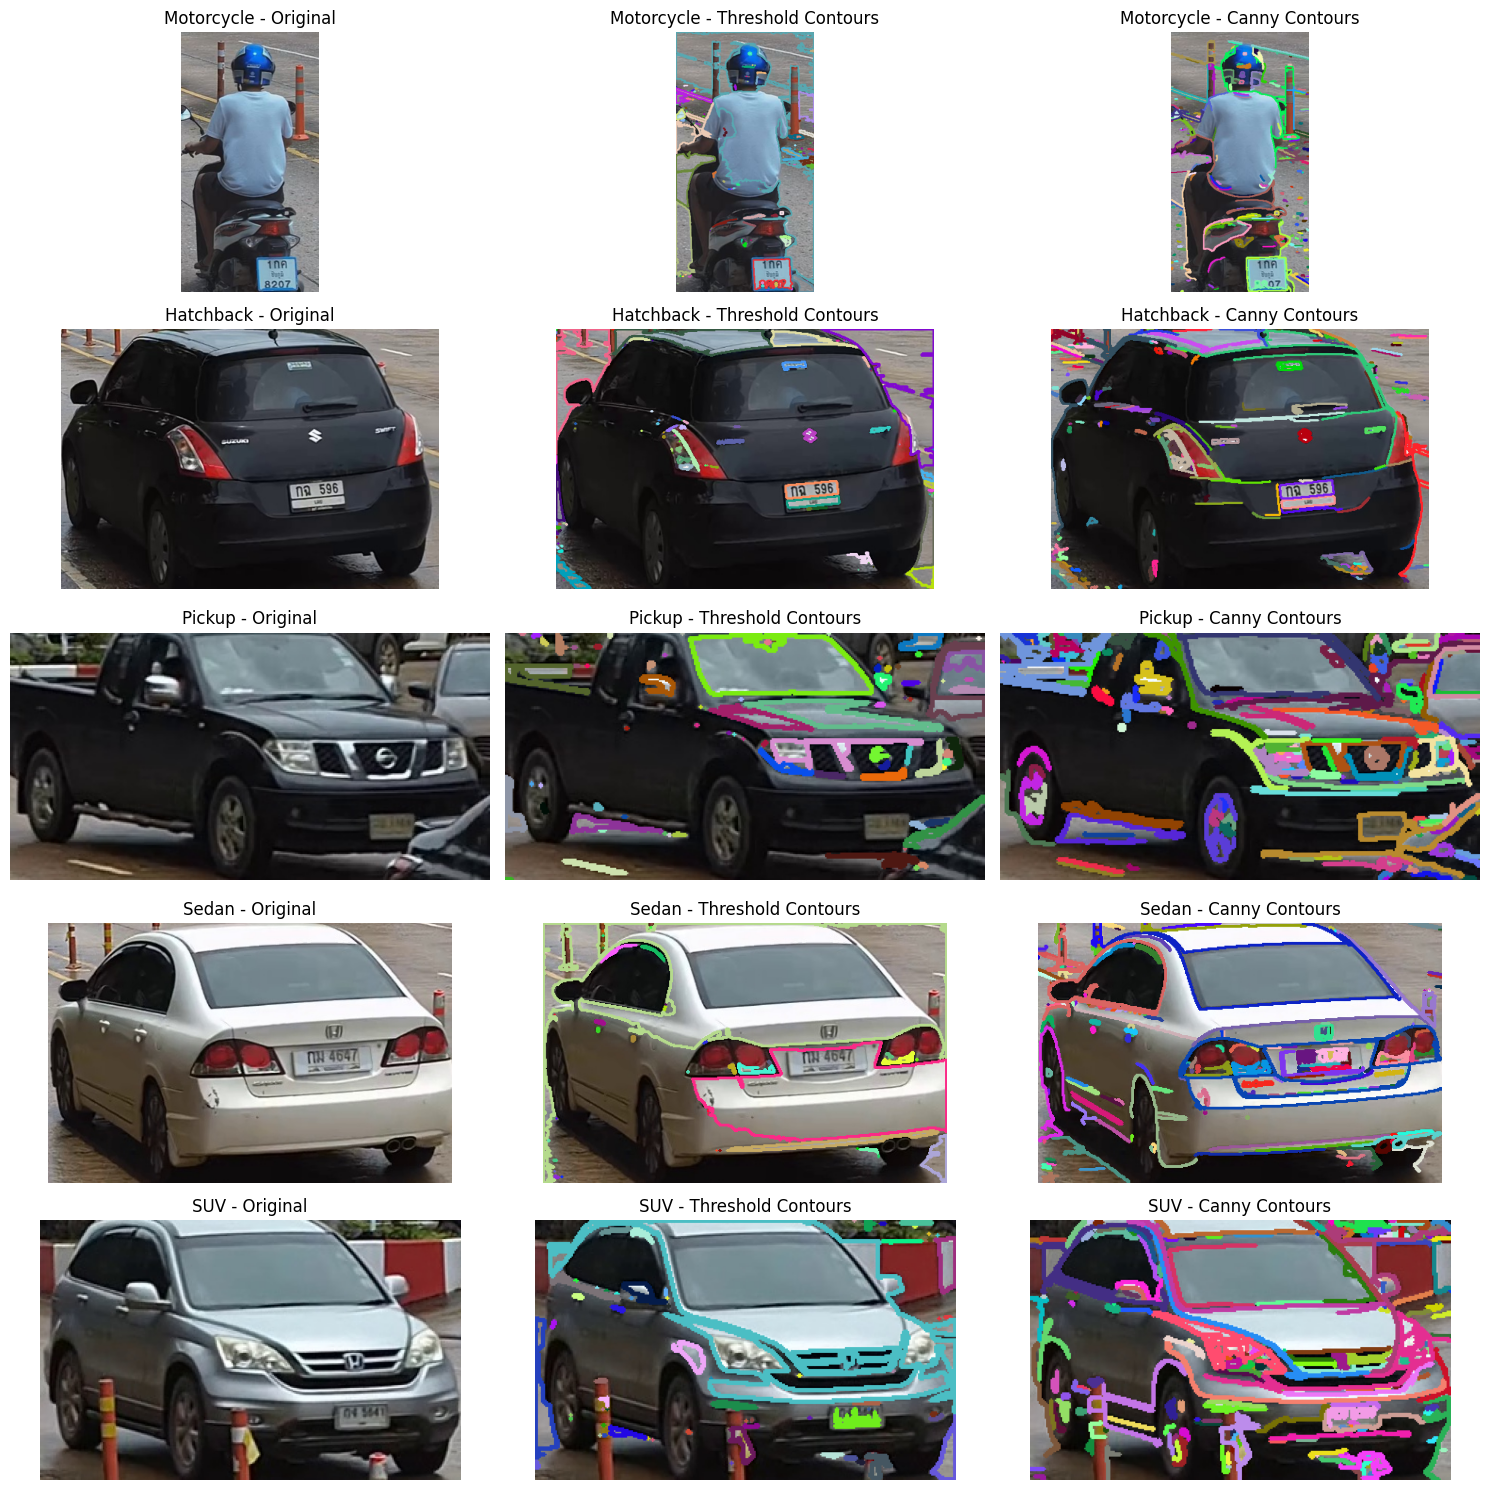

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

motorcycle = cv2.imread("../data/vehicles/r7bthvstxw-1/motorcycle/PIC_100.jpg")
hatchback = cv2.imread("../data/vehicles/r7bthvstxw-1/hatchback/PIC_100.jpg")
pickup = cv2.imread("../data/vehicles/r7bthvstxw-1/pickup/PIC_100.jpg")
sedan = cv2.imread("../data/vehicles/r7bthvstxw-1/sedan/PIC_100.jpg")
suv = cv2.imread("../data/vehicles/r7bthvstxw-1/suv/PIC_100.jpg")
images = [motorcycle, hatchback, pickup, sedan, suv]

# Convert images to grayscale
gray_motorcycle = cv2.cvtColor(motorcycle, cv2.COLOR_BGR2GRAY)
gray_hatchback = cv2.cvtColor(hatchback, cv2.COLOR_BGR2GRAY)
gray_pickup = cv2.cvtColor(pickup, cv2.COLOR_BGR2GRAY)
gray_sedan = cv2.cvtColor(sedan, cv2.COLOR_BGR2GRAY)
gray_suv = cv2.cvtColor(suv, cv2.COLOR_BGR2GRAY)

# Store grayscale images in a list
gray_images = [gray_motorcycle, gray_hatchback, gray_pickup, gray_sedan, gray_suv]
titles = ["Motorcycle", "Hatchback", "Pickup", "Sedan", "SUV"]


# Apply Canny edge detection
canny_motorcycle = cv2.Canny(gray_motorcycle, 100, 200)
canny_hatchback = cv2.Canny(gray_hatchback, 100, 200)
canny_pickup = cv2.Canny(gray_pickup, 100, 200)
canny_sedan = cv2.Canny(gray_sedan, 100, 200)
canny_suv = cv2.Canny(gray_suv, 100, 200)

# Store Canny edge images in a list
canny_images = [canny_motorcycle, canny_hatchback, canny_pickup, canny_sedan, canny_suv]

# Apply thresholding
_, thresh_motorcycle = cv2.threshold(gray_motorcycle, 127, 255, cv2.THRESH_BINARY)
_, thresh_hatchback = cv2.threshold(gray_hatchback, 127, 255, cv2.THRESH_BINARY)
_, thresh_pickup = cv2.threshold(gray_pickup, 127, 255, cv2.THRESH_BINARY)
_, thresh_sedan = cv2.threshold(gray_sedan, 127, 255, cv2.THRESH_BINARY)
_, thresh_suv = cv2.threshold(gray_suv, 127, 255, cv2.THRESH_BINARY)

# Store threshold images in a list
thresh_images = [
    thresh_motorcycle,
    thresh_hatchback,
    thresh_pickup,
    thresh_sedan,
    thresh_suv,
]


# Function to generate random colors
def random_color():
    return [random.randint(0, 255) for _ in range(3)]


# Create copies of original images to draw contours on them
contour_images_thresh = [img.copy() for img in images]
contour_images_canny = [img.copy() for img in images]

# Find and draw contours on thresholded images
for i in range(5):
    # Find contours in thresholded images
    contours_thresh, _ = cv2.findContours(
        thresh_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_thresh:
        color = random_color()
        cv2.drawContours(contour_images_thresh[i], [contour], -1, color, 2)

# Find and draw contours on Canny edge-detected images
for i in range(5):
    # Find contours in Canny images
    contours_canny, _ = cv2.findContours(
        canny_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_canny:
        color = random_color()
        cv2.drawContours(contour_images_canny[i], [contour], -1, color, 2)

# Visualize the results with contours

fig, axes = plt.subplots(5, 3, figsize=(15, 15))

for i in range(5):
    # Show original image
    axes[i, 0].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(titles[i] + " - Original")
    axes[i, 0].axis("off")

    # Show thresholded image with contours
    axes[i, 1].imshow(cv2.cvtColor(contour_images_thresh[i], cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title(titles[i] + " - Threshold Contours")
    axes[i, 1].axis("off")

    # Show Canny edge image with contours
    axes[i, 2].imshow(cv2.cvtColor(contour_images_canny[i], cv2.COLOR_BGR2RGB))
    axes[i, 2].set_title(titles[i] + " - Canny Contours")
    axes[i, 2].axis("off")

# Display the plots
plt.tight_layout()
plt.show()

**Calculate and display relevant statistics for each image, such as the number of contours
detected, contour area, and perimeter.**

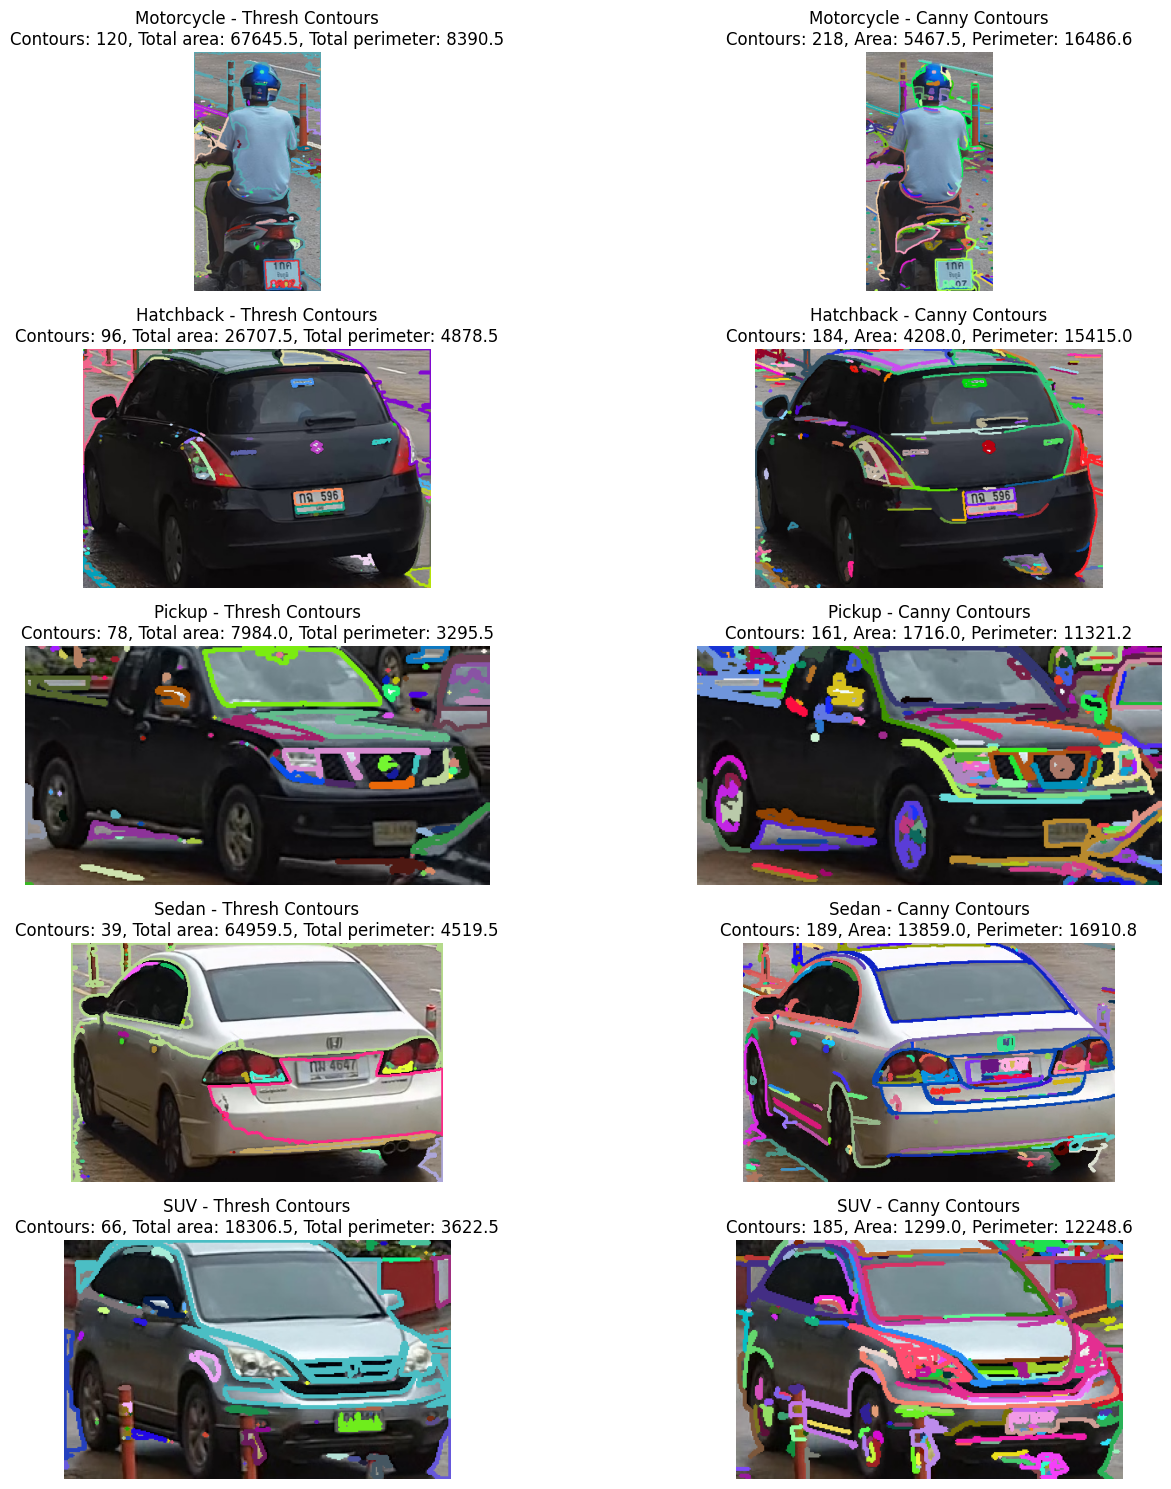

In [16]:
# Create lists to store the statistics
contour_stats_thresh = []
contour_stats_canny = []


# Helper function to compute contour statistics
def compute_contour_stats(contours):
    num_contours = len(contours)
    total_area = sum(cv2.contourArea(contour) for contour in contours)
    total_perimeter = sum(cv2.arcLength(contour, True) for contour in contours)
    return num_contours, total_area, total_perimeter


# Compute statistics for thresholded images
for i in range(5):
    contours_thresh, _ = cv2.findContours(
        thresh_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    stats_thresh = compute_contour_stats(contours_thresh)
    contour_stats_thresh.append(stats_thresh)

# Compute statistics for Canny edge images
for i in range(5):
    contours_canny, _ = cv2.findContours(
        canny_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    stats_canny = compute_contour_stats(contours_canny)
    contour_stats_canny.append(stats_canny)

# Visualize results and display statistics

fig, axes = plt.subplots(5, 2, figsize=(15, 15))

for i in range(5):
    # Show original image
    # axes[i, 0].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    # axes[i, 0].set_title(f"{titles[i]} - Original")
    # axes[i, 0].axis("off")

    # Show thresholded image with contours
    axes[i, 0].imshow(cv2.cvtColor(contour_images_thresh[i], cv2.COLOR_BGR2RGB))
    num_thresh, area_thresh, perimeter_thresh = contour_stats_thresh[i]
    axes[i, 0].set_title(
        f"{titles[i]} - Thresh Contours\nContours: {num_thresh}, Total area: {area_thresh:.1f}, Total perimeter: {perimeter_thresh:.1f}"
    )
    axes[i, 0].axis("off")

    # Show Canny edge image with contours
    axes[i, 1].imshow(cv2.cvtColor(contour_images_canny[i], cv2.COLOR_BGR2RGB))
    num_canny, area_canny, perimeter_canny = contour_stats_canny[i]
    axes[i, 1].set_title(
        f"{titles[i]} - Canny Contours\nContours: {num_canny}, Area: {area_canny:.1f}, Perimeter: {perimeter_canny:.1f}"
    )
    axes[i, 1].axis("off")

# Display the plots
plt.tight_layout()
plt.show()

**Compare the results of blob detection and contour detection for the chosen dataset.**



**Discuss the advantages and limitations of each technique.**

**Analyze the impact of different parameters (e.g., threshold values, filter sizes) on the
detection results**

In [18]:
# New threshold values for binary thresholding
threshold_values = [50, 127, 200]

# New parameters for Canny edge detection
canny_params = [(50, 150), (100, 200)]  # (low_threshold, high_threshold)

# Kernel sizes for Gaussian blur
kernel_sizes = [3, 5, 7]

# Create dictionaries to store statistics for different parameters
thresh_stats_by_value = {}
canny_stats_by_params = {}
canny_stats_by_blur = {}


# Function to apply threshold and get statistics
def apply_threshold_and_compute_stats(image, thresh_value):
    _, thresh_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(
        thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    return compute_contour_stats(contours), thresh_image


# Function to apply Canny and get statistics
def apply_canny_and_compute_stats(image, low_threshold, high_threshold, kernel_size=3):
    # Apply Gaussian blur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    canny_image = cv2.Canny(blurred_image, low_threshold, high_threshold)
    contours, _ = cv2.findContours(
        canny_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    return compute_contour_stats(contours), canny_image


# Analyze the effect of different threshold values
for i, img in enumerate(gray_images):
    stats_for_thresholds = []
    for thresh_value in threshold_values:
        stats, thresh_image = apply_threshold_and_compute_stats(img, thresh_value)
        stats_for_thresholds.append(stats)
    thresh_stats_by_value[titles[i]] = stats_for_thresholds

# Analyze the effect of different Canny thresholds
for i, img in enumerate(gray_images):
    stats_for_canny = []
    for low_thresh, high_thresh in canny_params:
        stats, canny_image = apply_canny_and_compute_stats(img, low_thresh, high_thresh)
        stats_for_canny.append(stats)
    canny_stats_by_params[titles[i]] = stats_for_canny

# Analyze the effect of different Gaussian blur kernel sizes
for i, img in enumerate(gray_images):
    stats_for_blur = []
    for kernel_size in kernel_sizes:
        stats, canny_image = apply_canny_and_compute_stats(
            img, 100, 200, kernel_size=kernel_size
        )
        stats_for_blur.append(stats)
    canny_stats_by_blur[titles[i]] = stats_for_blur

# Display results
for i, title in enumerate(titles):
    print(f"Analysis for {title}:")

    # Threshold value impact
    print("  Threshold Values Impact:")
    for j, thresh_value in enumerate(threshold_values):
        num, area, perimeter = thresh_stats_by_value[title][j]
        print(
            f"    Threshold {thresh_value}: Contours = {num}, Area = {area:.2f}, Perimeter = {perimeter:.2f}"
        )

    # Canny threshold impact
    print("  Canny Threshold Values Impact:")
    for j, (low_thresh, high_thresh) in enumerate(canny_params):
        num, area, perimeter = canny_stats_by_params[title][j]
        print(
            f"    Canny (low={low_thresh}, high={high_thresh}): Contours = {num}, Area = {area:.2f}, Perimeter = {perimeter:.2f}"
        )

    # Gaussian kernel size impact
    print("  Canny Gaussian Blur Kernel Size Impact:")
    for j, kernel_size in enumerate(kernel_sizes):
        num, area, perimeter = canny_stats_by_blur[title][j]
        print(
            f"    Kernel Size {kernel_size}: Contours = {num}, Area = {area:.2f}, Perimeter = {perimeter:.2f}"
        )

    print("\n")

Analysis for Motorcycle:
  Threshold Values Impact:
    Threshold 50: Contours = 48, Area = 109679.00, Perimeter = 4901.16
    Threshold 127: Contours = 120, Area = 67645.50, Perimeter = 8390.49
    Threshold 200: Contours = 43, Area = 720.00, Perimeter = 868.36
  Canny Threshold Values Impact:
    Canny (low=50, high=150): Contours = 138, Area = 2998.00, Perimeter = 17344.52
    Canny (low=100, high=200): Contours = 101, Area = 2082.50, Perimeter = 12903.74
  Canny Gaussian Blur Kernel Size Impact:
    Kernel Size 3: Contours = 101, Area = 2082.50, Perimeter = 12903.74
    Kernel Size 5: Contours = 78, Area = 1474.00, Perimeter = 10520.71
    Kernel Size 7: Contours = 53, Area = 1166.00, Perimeter = 7880.04


Analysis for Hatchback:
  Threshold Values Impact:
    Threshold 50: Contours = 134, Area = 69087.00, Perimeter = 7321.64
    Threshold 127: Contours = 96, Area = 26707.50, Perimeter = 4878.48
    Threshold 200: Contours = 91, Area = 306.50, Perimeter = 881.63
  Canny Threshold V

**Provide examples where one technique might be more suitable than the other.**

## **Testing av forskjellige contour algoritmer**